In [12]:
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
import os
import matplotlib.pyplot as plt
import mpl_scatter_density

# Comparing catalogue (vG+2023)

In [13]:
df_vg =  pd.read_csv('Catalogues/NGC1027_vG2023+GaiaDR3.csv')
df_vg

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
0,NGC_1027,465694821355155328,40.505659,61.784374,0.8964,-1.773,2.155,14.814943,15.274859,14.164726,...,0.3645,0.3534,0.3740,MARCS,40.505676,61.784365,0.326353,0.357943,-0.0824,0.0
1,NGC_1027,465694748331683200,40.523624,61.774185,0.9010,-1.622,2.198,17.604593,18.443653,16.716528,...,0.5752,0.5552,0.5943,MARCS,40.523639,61.774175,1.399436,1.442121,-0.1402,0.0
2,NGC_1027,465694683916216192,40.469041,61.767109,0.8540,-1.558,2.617,11.923204,12.138940,11.557860,...,0.6047,0.5997,0.6143,A,40.469056,61.767097,0.239440,0.276221,-0.0846,0.0
3,NGC_1027,465694610893071872,40.502789,61.752454,1.0832,-1.671,2.008,17.968418,18.876163,17.032963,...,0.4264,0.4069,0.4445,PHOENIX,40.502805,61.752445,1.819094,1.953410,-0.1343,0.0
4,NGC_1027,465694546477250432,40.544690,61.776256,0.9628,-1.686,2.204,17.046154,17.778336,16.227764,...,0.3364,0.3138,0.3570,PHOENIX,40.544705,61.776246,1.001668,1.054554,-0.1104,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,NGC_1027,465695474182156288,40.406755,61.776293,0.7598,-2.144,2.240,20.454760,21.504877,19.255125,...,NaN,NaN,NaN,NaN,40.406775,61.776283,10.129286,10.781652,-0.1126,0.0
1376,NGC_1027,465695435526822656,40.459302,61.776889,0.9625,-1.842,1.912,17.249964,17.985037,16.378658,...,0.3898,0.3664,0.4093,PHOENIX,40.459319,61.776881,1.298300,1.377348,-0.1684,0.0
1377,NGC_1027,465695126289128576,40.340698,61.742587,0.6292,-1.685,2.128,19.259914,20.094313,18.372610,...,NaN,NaN,NaN,NaN,40.340714,61.742578,4.578806,5.166427,-0.2178,0.0
1378,NGC_1027,465695096222913152,40.387508,61.768844,0.3626,-1.220,2.507,20.064852,21.051865,18.944124,...,NaN,NaN,NaN,NaN,40.387520,61.768833,8.462630,8.415401,0.0792,0.0


In [14]:
jj, = np.where(df_vg.Pmemb >= 0.7)
dfvg = df_vg.iloc[jj]

In [15]:
dfvg

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
0,NGC_1027,465694821355155328,40.505659,61.784374,0.8964,-1.773,2.155,14.814943,15.274859,14.164726,...,0.3645,0.3534,0.3740,MARCS,40.505676,61.784365,0.326353,0.357943,-0.0824,0.0
1,NGC_1027,465694748331683200,40.523624,61.774185,0.9010,-1.622,2.198,17.604593,18.443653,16.716528,...,0.5752,0.5552,0.5943,MARCS,40.523639,61.774175,1.399436,1.442121,-0.1402,0.0
2,NGC_1027,465694683916216192,40.469041,61.767109,0.8540,-1.558,2.617,11.923204,12.138940,11.557860,...,0.6047,0.5997,0.6143,A,40.469056,61.767097,0.239440,0.276221,-0.0846,0.0
3,NGC_1027,465694610893071872,40.502789,61.752454,1.0832,-1.671,2.008,17.968418,18.876163,17.032963,...,0.4264,0.4069,0.4445,PHOENIX,40.502805,61.752445,1.819094,1.953410,-0.1343,0.0
4,NGC_1027,465694546477250432,40.544690,61.776256,0.9628,-1.686,2.204,17.046154,17.778336,16.227764,...,0.3364,0.3138,0.3570,PHOENIX,40.544705,61.776246,1.001668,1.054554,-0.1104,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,NGC_1027,465699421256538368,40.269906,61.848165,0.9031,-1.868,1.933,17.708502,18.587675,16.822248,...,0.4368,0.3484,0.4884,PHOENIX,40.269923,61.848156,1.550565,1.533550,-0.1668,0.0
1373,NGC_1027,465699215097697664,40.361267,61.884989,0.8797,-1.744,2.062,16.665634,17.330374,15.860227,...,0.5042,0.4890,0.5181,MARCS,40.361283,61.884980,0.833605,0.912919,-0.1607,0.0
1374,NGC_1027,465695474190193408,40.427435,61.781116,0.7913,-1.737,2.134,16.822556,17.511656,16.019714,...,0.6440,0.6199,0.6546,PHOENIX,40.427452,61.781107,0.928986,0.960028,-0.1326,0.0
1376,NGC_1027,465695435526822656,40.459302,61.776889,0.9625,-1.842,1.912,17.249964,17.985037,16.378658,...,0.3898,0.3664,0.4093,PHOENIX,40.459319,61.776881,1.298300,1.377348,-0.1684,0.0


# 5 Populations

In [16]:
p1 = pd.read_csv('Catalogues/pop1_NGC1027_Kmeans1.csv')
p2 = pd.read_csv('Catalogues/pop2_NGC1027_Kmeans1.csv')
p3 = pd.read_csv('Catalogues/pop3_NGC1027_Kmeans1.csv')
p4 = pd.read_csv('Catalogues/pop4_NGC1027_Kmeans1.csv')
p5 = pd.read_csv('Catalogues/pop5_NGC1027_Kmeans1.csv')

## Computing Completeness and Purity

### Population 1

In [17]:
ra1 = p1.RAJ2000
dec1 = p1.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [18]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [19]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [20]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [21]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [22]:
p1.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
23,38.660484,61.244999,-1.875,1.774,18.044550,2.012011,0.8815,0
45,37.209268,61.363332,-1.899,1.938,16.734627,1.794055,0.9248,0
72,40.070913,61.646757,-1.799,1.792,17.853050,1.797894,0.8935,0
73,40.356619,61.681958,-1.972,1.855,17.544037,1.682507,0.9323,0
75,40.269923,61.848156,-1.868,1.933,17.708502,1.765427,0.9031,0
78,40.593540,61.815339,-2.164,1.953,17.774517,1.817306,0.8510,0
108,39.840373,61.706374,-2.007,2.139,17.575466,1.751877,0.9450,0
109,39.516314,61.707838,-2.041,1.726,18.107975,1.945528,0.8861,0
130,38.533051,61.793842,-1.963,2.079,18.370346,2.094942,0.9251,0
134,38.442543,61.910156,-1.944,1.639,15.653497,1.460711,0.8299,0


In [23]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
816,NGC_1027,465480652801913472,38.660466,61.245007,0.8815,-1.875,1.774,18.044550,19.085930,17.073920,...,0.6535,0.6171,0.6820,PHOENIX,38.660484,61.244999,1.960133,2.096052,-0.1380,0.0
508,NGC_1027,465521407754231552,37.209251,61.363341,0.9248,-1.899,1.938,16.734627,17.599964,15.805909,...,0.9301,0.9136,0.9467,MARCS,37.209268,61.363332,0.854568,0.822522,-0.0383,0.0
272,NGC_1027,465689972328188032,40.070897,61.646765,0.8935,-1.799,1.792,17.853050,18.732609,16.934715,...,0.3503,0.3119,0.4144,PHOENIX,40.070913,61.646757,1.692259,1.678576,-0.0484,0.0
300,NGC_1027,465692583668388480,40.356601,61.681966,0.9323,-1.972,1.855,17.544037,18.361359,16.678852,...,0.3441,0.3272,0.3615,PHOENIX,40.356619,61.681958,1.710408,1.609309,-0.2314,0.0
1372,NGC_1027,465699421256538368,40.269906,61.848165,0.9031,-1.868,1.933,17.708502,18.587675,16.822248,...,0.4368,0.3484,0.4884,PHOENIX,40.269923,61.848156,1.550565,1.533550,-0.1668,0.0
605,NGC_1027,465788726520582784,40.593519,61.815348,0.8510,-2.164,1.953,17.774517,18.670403,16.853096,...,0.1124,0.1056,0.1200,MARCS,40.593540,61.815339,1.654957,1.617497,-0.0843,0.0
1149,NGC_1027,465878779090666368,39.840354,61.706384,0.9450,-2.007,2.139,17.575466,18.428988,16.677110,...,0.3006,0.2433,0.5320,PHOENIX,39.840373,61.706374,1.498732,1.410078,-0.0380,0.0
1104,NGC_1027,465881016775502976,39.516295,61.707846,0.8861,-2.041,1.726,18.107975,19.104458,17.158930,...,0.4301,0.3451,0.5284,PHOENIX,39.516314,61.707838,1.852270,2.067463,0.0151,0.0
937,NGC_1027,465918155354119680,38.533033,61.793851,0.9251,-1.963,2.079,18.370346,19.461143,17.366201,...,0.5140,0.4913,0.5353,MARCS,38.533051,61.793842,2.303361,2.269982,-0.1118,0.0
934,NGC_1027,465920083798749312,38.442525,61.910163,0.8299,-1.944,1.639,15.653497,16.316977,14.856265,...,1.0838,1.0725,1.0937,A,38.442543,61.910156,0.433681,0.475743,-0.0762,0.0


Text(0, 0.5, 'DEC (deg)')

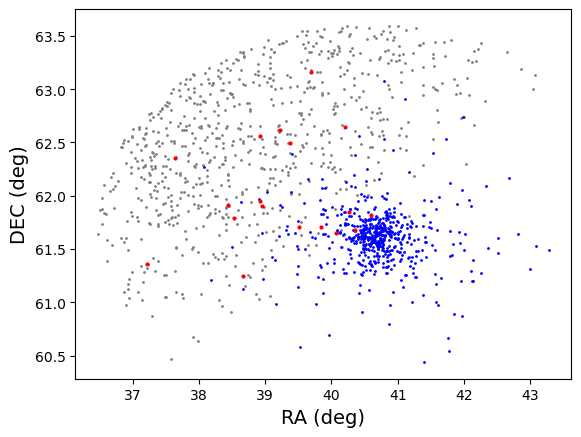

In [26]:
fig, ax = plt.subplots()

ax.scatter(p1.RAJ2000, p1.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p1.iloc[matched_idx_catalog1].RAJ2000, p1.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [27]:
dfvg_t = len(dfvg)
p1_t = len(p1.iloc[matched_idx_catalog1])

Completeness


In [28]:
p1_c = p1_t /dfvg_t
p1_c*100

3.015075376884422

Pureness

In [29]:
p1_p = p1_t/len(p1)
p1_p*100

2.313624678663239

### Population 2

In [30]:
ra1 = p2.RAJ2000
dec1 = p2.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [31]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [32]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [33]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [34]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [35]:
p2

,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
0,41.090346,59.764166,-1.709,1.128,19.790482,2.486855,0.9709,1
1,41.327822,59.889579,-3.144,1.138,19.760437,1.911133,0.9749,1
2,40.269777,59.712123,-3.322,0.821,19.766462,2.206757,1.0687,1
3,40.132065,59.669320,-3.398,1.104,19.049986,2.179188,0.8918,1
4,39.647633,59.684391,-2.455,0.226,19.534328,2.221422,0.8802,1
...,...,...,...,...,...,...,...,...
675,41.273297,63.020533,-3.609,0.685,20.720572,2.001822,0.9174,1
676,41.154532,63.007876,-2.843,0.341,19.567590,2.073412,0.9540,1
677,41.122054,63.262907,-2.379,0.298,18.404411,2.015812,0.9872,1
678,42.096480,63.213758,-2.597,1.185,20.248365,1.733335,0.9851,1


In [36]:
p2.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster


In [37]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist


Text(0, 0.5, 'DEC (deg)')

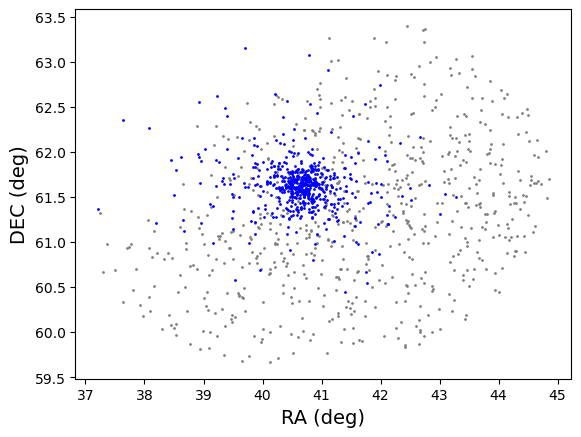

In [38]:
fig, ax = plt.subplots()

ax.scatter(p2.RAJ2000, p2.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p2.iloc[matched_idx_catalog1].RAJ2000, p2.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [39]:
dfvg_t = len(dfvg)
p2_t = len(p2.iloc[matched_idx_catalog1])

Completeness


In [40]:
p2_c = p2_t /dfvg_t
p2_c*100

0.0

Pureness

In [41]:
p2_p = p2_t/len(p2)
p2_p*100

0.0

### Population 3

In [42]:
ra1 = p3.RAJ2000
dec1 = p3.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [43]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [44]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [45]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [46]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [47]:
p3.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
127,40.422413,61.087284,-1.824,1.933,17.097599,1.682651,1.0374,2
140,40.607975,61.336185,-1.467,1.869,15.721642,1.443523,0.9886,2
142,40.657018,61.368755,-1.619,2.100,18.314913,1.956467,0.9705,2
145,40.778560,61.367838,-1.828,1.918,16.825521,1.567552,0.9788,2
146,40.831929,61.387547,-1.543,1.789,16.774263,1.534787,0.9779,2
...,...,...,...,...,...,...,...,...
359,39.477019,61.532111,-1.939,1.864,15.808213,1.345776,0.9874,2
360,39.446690,61.648633,-1.822,2.327,16.605627,1.501449,0.9906,2
379,40.080775,61.814781,-2.119,2.208,18.602232,2.077684,0.9937,2
481,40.799703,62.531996,-1.725,1.986,17.081020,1.657507,0.9817,2


In [48]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
1367,NGC_1027,465593494484211712,40.422396,61.087292,1.0374,-1.824,1.933,17.097599,17.905810,16.223158,...,0.5884,0.5729,0.6067,PHOENIX,40.422413,61.087284,1.107096,1.028673,-0.0489,0.0
1097,NGC_1027,465621016635641856,40.607961,61.336193,0.9886,-1.467,1.869,15.721642,16.366010,14.922488,...,0.8980,0.8925,0.9041,PHOENIX,40.607975,61.336185,0.604599,0.684301,-0.0977,0.0
1121,NGC_1027,465621149774787840,40.657003,61.368764,0.9705,-1.619,2.100,18.314913,19.330532,17.374065,...,0.2801,0.2540,0.3047,PHOENIX,40.657018,61.368755,1.905231,2.275511,-0.1558,0.0
1268,NGC_1027,465626101876878976,40.778543,61.367847,0.9788,-1.828,1.918,16.825521,17.559204,15.991653,...,0.5304,0.5170,0.5445,MARCS,40.778560,61.367838,0.808412,0.898395,-0.0923,0.0
1274,NGC_1027,465626514193723776,40.831915,61.387555,0.9779,-1.543,1.789,16.774263,17.491129,15.956342,...,0.6897,0.6673,0.7002,PHOENIX,40.831929,61.387547,0.793681,0.898322,-0.0690,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1358,NGC_1027,465851776637578496,39.477001,61.532119,0.9874,-1.939,1.864,15.808213,16.405394,15.059618,...,0.5778,0.5633,0.5881,MARCS,39.477019,61.532111,0.509547,0.539707,-0.1025,0.0
1321,NGC_1027,465856995016340736,39.446673,61.648643,0.9906,-1.822,2.327,16.605627,17.290298,15.788850,...,0.5203,0.5046,0.5432,MARCS,39.446690,61.648633,0.878256,0.956723,0.0112,0.0
1126,NGC_1027,465885620975594240,40.080755,61.814791,0.9937,-2.119,2.208,18.602232,19.687593,17.609910,...,0.5689,0.5473,0.5860,PHOENIX,40.080775,61.814781,2.667649,2.934599,-0.2112,0.0
140,NGC_1027,466023644050466560,40.799686,62.532005,0.9817,-1.725,1.986,17.081020,17.874979,16.217472,...,0.5583,0.5422,0.5725,PHOENIX,40.799703,62.531996,0.999452,1.078600,-0.0472,0.0


Text(0, 0.5, 'DEC (deg)')

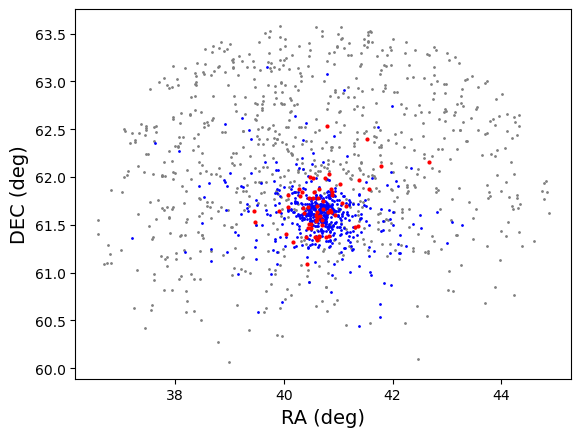

In [49]:
fig, ax = plt.subplots()

ax.scatter(p3.RAJ2000, p3.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p3.iloc[matched_idx_catalog1].RAJ2000, p3.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [50]:
dfvg_t = len(dfvg)
p3_t = len(p3.iloc[matched_idx_catalog1])

Completeness


In [51]:
p3_c = p3_t /dfvg_t
p3_c*100

10.552763819095476

Pureness

In [52]:
p3_p = p3_t/len(p3)
p3_p*100

7.118644067796611

### Population 4

In [53]:
ra1 = p4.RAJ2000
dec1 = p4.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [54]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [55]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [56]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [57]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [58]:
p4.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
153,41.773842,60.540364,-1.799,2.160,17.921892,1.896875,0.8545,3
241,42.129525,61.202528,-1.683,2.050,17.742489,1.740564,0.8452,3
242,42.106408,61.296691,-1.412,2.007,17.682974,1.716513,0.9305,3
250,43.087664,61.532170,-1.653,2.000,16.749838,1.668623,0.9334,3
315,39.961185,60.691539,-1.785,1.676,17.667414,1.862482,0.8992,3
...,...,...,...,...,...,...,...,...
621,40.931388,61.807583,-1.627,2.136,18.231544,1.854101,0.9073,3
623,41.107812,61.803141,-1.973,2.297,18.040358,2.090603,0.8337,3
630,40.392330,61.874599,-1.458,2.319,17.578274,1.852362,0.8847,3
655,39.839686,61.832279,-1.804,2.422,17.154474,1.713953,0.9221,3


In [59]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
779,NGC_1027,464776037646911104,41.773826,60.540374,0.8545,-1.799,2.160,17.921892,18.853360,16.956484,...,0.4450,0.4032,0.5247,PHOENIX,41.773842,60.540364,1.608477,1.663375,-0.1617,0.0
395,NGC_1027,464952681062317696,42.129509,61.202537,0.8452,-1.683,2.050,17.742489,18.591160,16.850595,...,0.2859,0.2431,0.3285,PHOENIX,42.129525,61.202528,1.581109,1.648712,-0.2475,0.0
403,NGC_1027,464954334632868864,42.106395,61.296700,0.9305,-1.412,2.007,17.682974,18.510344,16.793830,...,0.3610,0.3454,0.3776,PHOENIX,42.106408,61.296691,1.454143,1.531836,-0.1831,0.0
112,NGC_1027,464972888890793728,43.087649,61.532179,0.9334,-1.653,2.000,16.749838,17.531164,15.862541,...,0.4162,0.3997,0.4268,PHOENIX,43.087664,61.532170,0.995501,0.878127,-0.1494,0.0
517,NGC_1027,465206122792910592,39.961169,60.691546,0.8992,-1.785,1.676,17.667414,18.593813,16.731330,...,0.7456,0.7268,0.7678,PHOENIX,39.961185,60.691539,1.567187,1.446763,0.0234,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,NGC_1027,465777486580806912,40.931373,61.807593,0.9073,-1.627,2.136,18.231544,19.081750,17.227650,...,0.1061,0.0925,0.1150,PHOENIX,40.931388,61.807583,2.097462,1.975790,-0.1213,0.0
505,NGC_1027,465779861708248704,41.107794,61.803151,0.8337,-1.973,2.297,18.040358,19.133898,17.043295,...,0.9010,0.8649,0.9272,MARCS,41.107812,61.803141,1.783602,1.736076,-0.1293,0.0
593,NGC_1027,465792776664493056,40.392316,61.874609,0.8847,-1.458,2.319,17.578274,18.483139,16.630777,...,0.8517,0.8379,0.8660,MARCS,40.392330,61.874599,1.419443,1.451071,-0.1743,0.0
1106,NGC_1027,465880638818511104,39.839670,61.832289,0.9221,-1.804,2.422,17.154474,17.985922,16.271969,...,0.6285,0.6114,0.6593,PHOENIX,39.839686,61.832279,1.164659,1.125099,-0.1679,0.0


Text(0, 0.5, 'DEC (deg)')

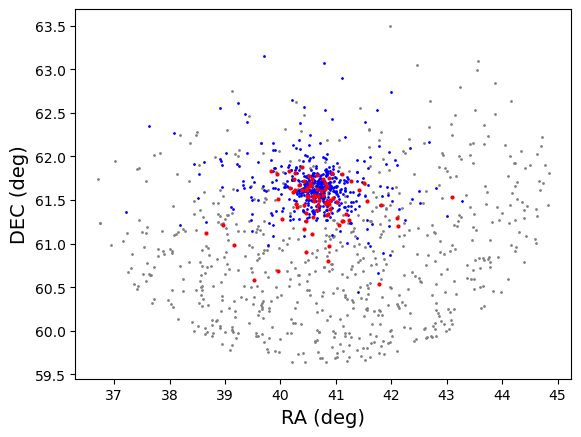

In [60]:
fig, ax = plt.subplots()

ax.scatter(p4.RAJ2000, p4.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p4.iloc[matched_idx_catalog1].RAJ2000, p4.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [61]:
dfvg_t = len(dfvg)
p4_t = len(p4.iloc[matched_idx_catalog1])

Completeness


In [62]:
p4_c = p4_t /dfvg_t
p4_c*100

14.237855946398659

Pureness

In [63]:
p4_p = p4_t/len(p4)
p4_p*100

11.12565445026178

### Population 5

In [64]:
ra1 = p5.RAJ2000
dec1 = p5.DEJ2000

ra2 = dfvg.RAJ2000
dec2 = dfvg.DEJ2000

In [65]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [66]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [67]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [68]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [69]:
p5.iloc[matched_idx_catalog1]


,RAJ2000,DEJ2000,pmRA,pmDE,Gmag,BP-RP,Plx,cluster
24,41.391990,60.440964,-1.793,1.868,15.092919,1.412945,0.8665,4
26,41.760699,60.667437,-1.459,2.020,15.022243,1.328855,0.9060,4
29,41.971382,60.869417,-1.530,2.133,13.546622,0.857985,0.8965,4
32,41.851700,60.892318,-1.809,1.878,12.826741,0.889601,0.9197,4
35,41.611992,60.973924,-1.594,1.968,15.476273,1.462549,0.9201,4
...,...,...,...,...,...,...,...,...
675,40.418894,62.564516,-1.798,2.388,13.865103,0.935928,0.9564,4
802,41.991470,62.738418,-1.732,2.268,16.083628,1.326920,0.9009,4
825,41.114905,62.905420,-1.936,2.048,8.369972,1.432346,0.9308,4
831,40.787309,63.076058,-1.898,2.113,16.967535,1.562469,0.8373,4


In [70]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,...,E(BP-RP),b_E(BP-RP)_x,B_E(BP-RP)_xa,Lib,RAJ2000,DEJ2000,e_RAJ2000,e_DEJ2000,RADEcorJ2000,angDist
859,NGC_1027,464797963461759488,41.391974,60.440972,0.8665,-1.793,1.868,15.092919,15.710403,14.297459,...,1.0850,1.0804,1.0892,MARCS,41.391990,60.440964,0.358247,0.381025,-0.1236,0.0
687,NGC_1027,464824798418117120,41.760686,60.667446,0.9060,-1.459,2.020,15.022243,15.609508,14.280652,...,0.9842,0.9744,0.9895,MARCS,41.760699,60.667437,0.355979,0.334857,-0.1361,0.0
669,NGC_1027,464833766309733248,41.971368,60.869426,0.8965,-1.530,2.133,13.546622,13.889764,13.031779,...,0.8384,0.8376,0.8392,A,41.971382,60.869417,0.208742,0.191189,-0.1311,0.0
673,NGC_1027,464836652527754368,41.851684,60.892326,0.9197,-1.809,1.878,12.826741,13.182690,12.293089,...,NaN,NaN,NaN,NaN,41.851700,60.892318,0.215535,0.196625,-0.0597,0.0
643,NGC_1027,464850499494348160,41.611977,60.973933,0.9201,-1.594,1.968,15.476273,16.141022,14.678472,...,0.7778,0.7738,0.7821,MARCS,41.611992,60.973924,0.467484,0.443929,0.0319,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,NGC_1027,466034982764139008,40.418877,62.564527,0.9564,-1.798,2.388,13.865103,14.244426,13.308497,...,0.7283,0.7138,0.7313,PHOENIX,40.418894,62.564516,0.242437,0.240394,-0.1078,0.0
465,NGC_1027,467345360106608000,41.991454,62.738428,0.9009,-1.732,2.268,16.083628,16.674650,15.347731,...,0.4250,0.4146,0.4355,MARCS,41.991470,62.738418,0.643855,0.764214,-0.1848,0.0
452,NGC_1027,467535884855567872,41.114886,62.905429,0.9308,-1.936,2.048,8.369972,9.017055,7.584709,...,NaN,NaN,NaN,NaN,41.114905,62.905420,0.294193,0.310339,-0.1056,0.0
83,NGC_1027,467553236523330816,40.787290,63.076067,0.8373,-1.898,2.113,16.967535,17.682224,16.119755,...,0.4930,0.4739,0.5081,PHOENIX,40.787309,63.076058,1.053457,1.116594,-0.3722,0.0


Text(0, 0.5, 'DEC (deg)')

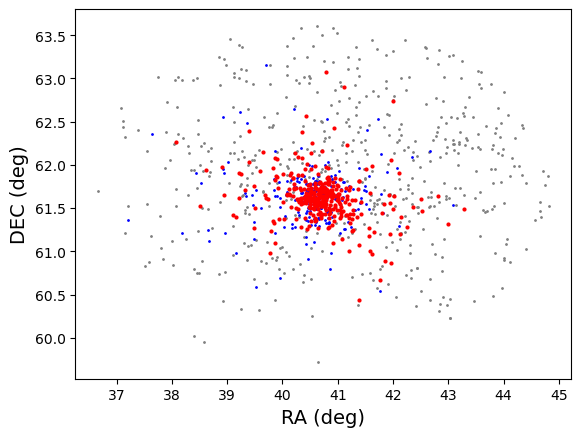

In [72]:
fig, ax = plt.subplots()

ax.scatter(p5.RAJ2000, p5.DEJ2000, s=1, c='grey')
ax.scatter(dfvg.RAJ2000, dfvg.DEJ2000, s=1, c='b')
ax.scatter(p5.iloc[matched_idx_catalog1].RAJ2000, p5.iloc[matched_idx_catalog1].DEJ2000, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [73]:
dfvg_t = len(dfvg)
p5_t = len(p5.iloc[matched_idx_catalog1])

Completeness


In [74]:
p5_c = p5_t /dfvg_t
p5_c*100

60.30150753768844

Pureness

In [75]:
p5_p = p5_t/len(p5)
p5_p*100

40.54054054054054

## Analyzing

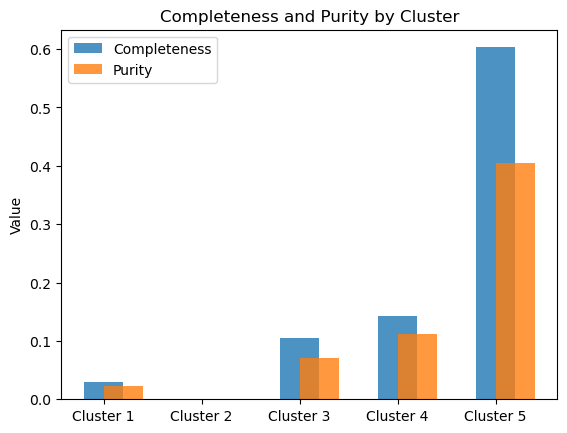

In [76]:
import seaborn as sns

# Dados simulados: completude e pureza por cluster
clusters = [1, 2, 3, 4, 5]
completeness = [p1_c, p2_c, p3_c, p4_c, p5_c]  # Exemplo de completude
purity = [p1_p, p2_p, p3_p, p4_p, p5_p]  # Exemplo de pureza

# Bar plot
x = range(len(clusters))
plt.bar(x, completeness, width=0.4, label="Completeness", alpha=0.8, align='center')
plt.bar(x, purity, width=0.4, label="Purity", alpha=0.8, align='edge')

plt.xticks(x, [f"Cluster {c}" for c in clusters])
plt.ylabel("Value")
plt.title("Completeness and Purity by Cluster")
plt.legend()
plt.show()